In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 4.1 Bạch Thảo

In [ ]:
df = pd.read_csv('numerical_dataset.csv')
df

,ID,Feature1,Feature2
0,1,2.3,3.1
1,2,1.9,3.7
2,3,4.5,4.0
3,4,3.5,4.5
4,5,4.8,3.9
5,6,2.0,2.5
6,7,3.8,3.8
7,8,1.5,1.9
8,9,4.1,4.4
9,10,2.6,3.3


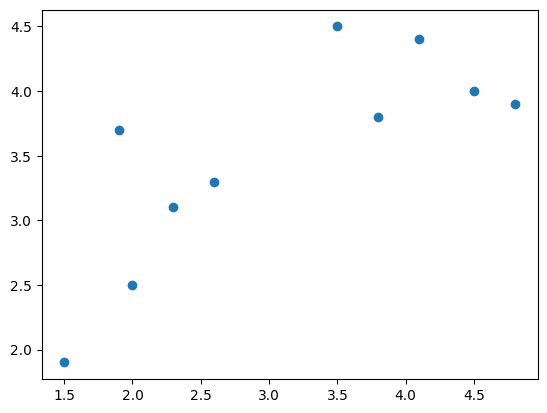

In [ ]:
plt.scatter(df['Feature1'],df['Feature2'])
plt.show()

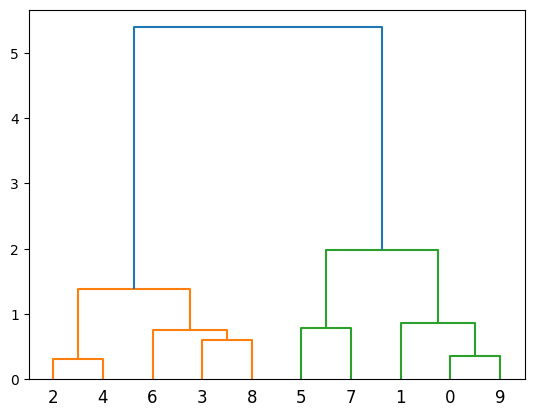

In [ ]:
data = list(zip(df['Feature1'], df['Feature2']))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

#### Apply Agglomerative Hierarchical Clustering

In [ ]:
df_ = df.drop(columns='ID')

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=2,metric='euclidean', linkage='ward')
clusters = agg_clustering.fit_predict(df_)
clusters

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0])

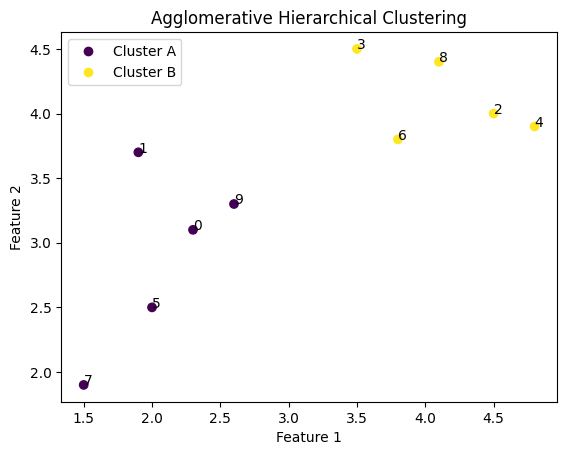

In [ ]:
df['Cluster'] = clusters
custom_labels = ['Cluster A', 'Cluster B','Cluster C']

# Visualize the clusters
scatter = plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
for i in range(len(df)):
    plt.annotate(df['ID'][i] - 1, (df['Feature1'][i], df['Feature2'][i]))


plt.legend(handles=scatter.legend_elements()[0],labels=custom_labels)
plt.show()


# 4.2 Quỳnh Hoa

In [ ]:
df = pd.read_csv('/content/numerical_dataset.csv')
df

,ID,Feature1,Feature2
0,1,2.3,3.1
1,2,1.9,3.7
2,3,4.5,4.0
3,4,3.5,4.5
4,5,4.8,3.9
5,6,2.0,2.5
6,7,3.8,3.8
7,8,1.5,1.9
8,9,4.1,4.4
9,10,2.6,3.3


## K-Means Clustering Hands-on

### n_clusters = 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


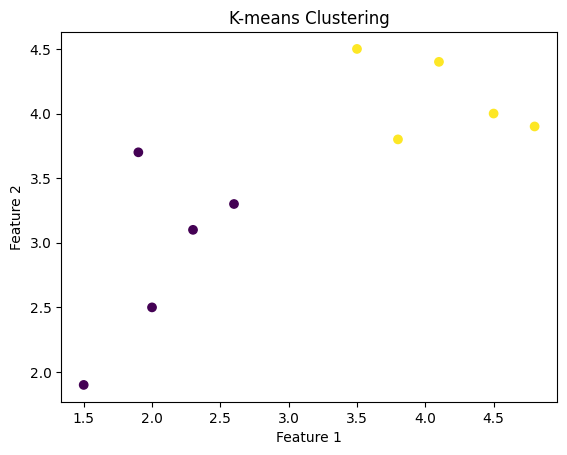

In [ ]:
kmeans = KMeans(n_clusters=2).fit(df[['Feature1', 'Feature2']])
df['Cluster'] = kmeans.labels_
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

The data is divided into two main clusters. It's let distance between value in one cluster become larger. More than that, this result too general for analysis.

### n_clusters = 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


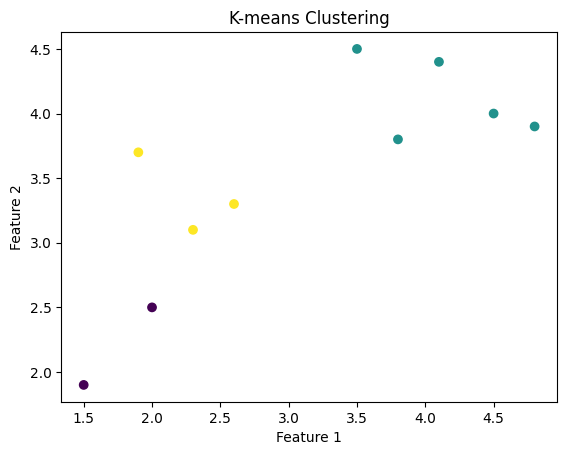

In [ ]:
kmeans = KMeans(n_clusters=3).fit(df[['Feature1', 'Feature2']])
df['Cluster'] = kmeans.labels_
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

It can be observe to be a relevant number of clustering for this type of dataset for dividing into 3 parts. Each terms of each parts does not much different and the distance between each part is reasonable.

### n_clusters = 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


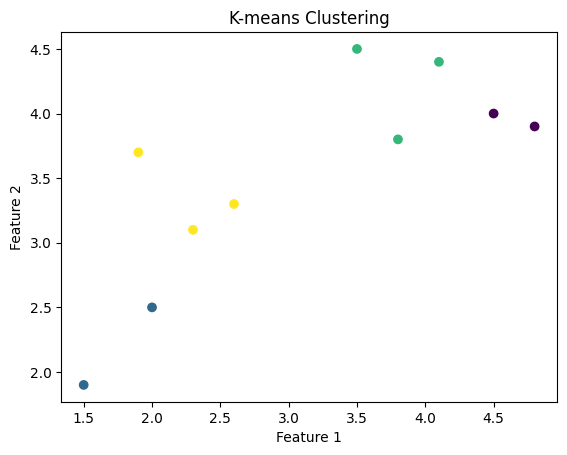

In [ ]:
kmeans = KMeans(n_clusters=4).fit(df[['Feature1', 'Feature2']])
df['Cluster'] = kmeans.labels_
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

Too many parts for range of the given dataset. The distance between each part is nearly similar with the difference of each terms in part. More number of clustering can lead the algorithm becomes difficult and need more time to calculate.

## Hierarchical clustering

### Agglomerative

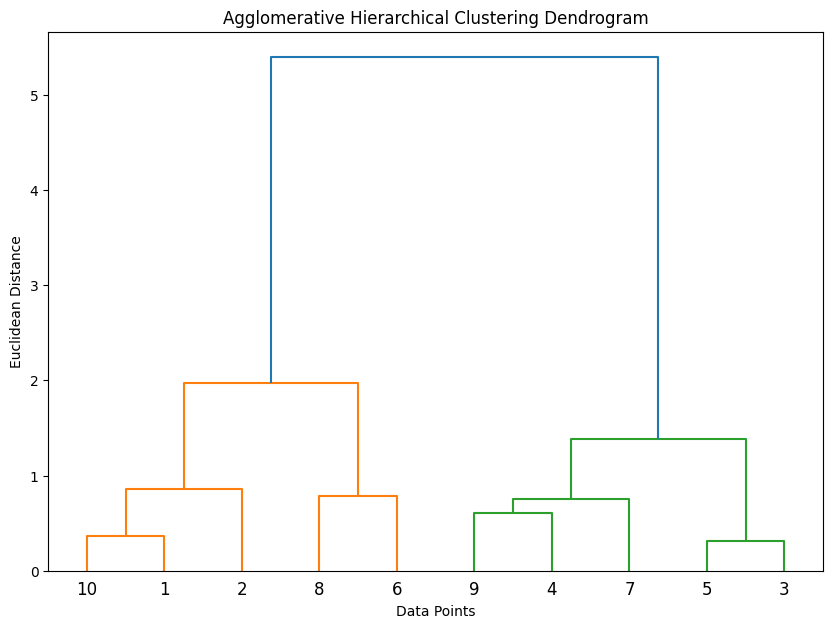

In [ ]:
linked = linkage(df[['Feature1', 'Feature2']], method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df['ID'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

### Divisive

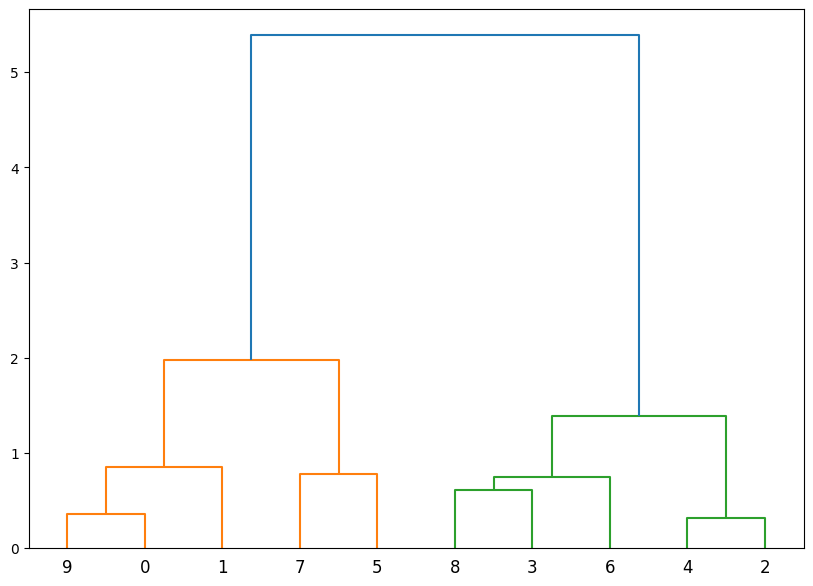

In [ ]:
X = df[['Feature1', 'Feature2']]

def divisive_hierarchical_clustering(X, max_clusters=10):
    n_samples = X.shape[0]
    clusters = np.arange(n_samples)

    def recursive_division(X, clusters, max_clusters):
        if len(np.unique(clusters)) == max_clusters:
            return clusters

        # Find the cluster with the largest diameter
        max_diameter = -1
        max_cluster = None
        for cluster_id in np.unique(clusters):
            cluster_indices = np.where(clusters == cluster_id)[0]
            cluster_data = X.iloc[cluster_indices]
            cluster_diameter = np.max(np.linalg.norm(cluster_data - np.mean(cluster_data, axis=0), axis=1))
            if cluster_diameter > max_diameter:
                max_diameter = cluster_diameter
                max_cluster = cluster_id

        # Split the cluster into two subclusters
        cluster_indices = np.where(clusters == max_cluster)[0]
        cluster_data = X.iloc[cluster_indices]
        if len(cluster_data) < 2:
            return clusters

        clusterer = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
        sub_clusters = clusterer.fit_predict(cluster_data)

        # Update cluster assignments
        clusters[cluster_indices[sub_clusters == 0]] = max(clusters) + 1
        clusters[cluster_indices[sub_clusters == 1]] = max_cluster

        return recursive_division(X, clusters, max_clusters)

    final_clusters = recursive_division(X, clusters, max_clusters)
    return final_clusters

final_clusters = divisive_hierarchical_clustering(X, max_clusters=3)

# Plotting dendrogram
linked = linkage(X, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

# 4.3 Bá Triết

In [ ]:
data = pd.read_csv("spatial_dataset.csv")
X = data[['X', 'Y']]

In [ ]:
epsilon = 1.0
min_samples = 3
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X)

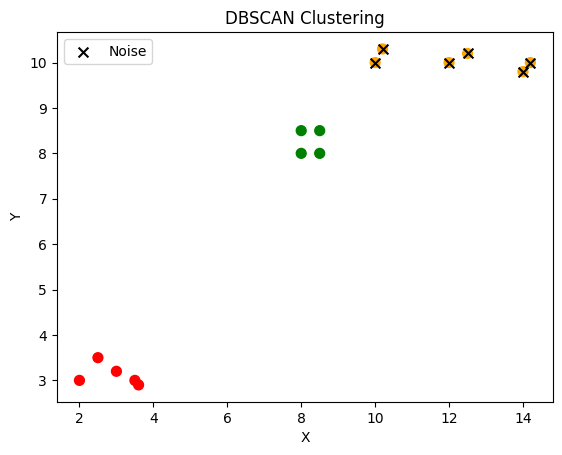

Cluster Assignments:
       X     Y  DBSCAN_Cluster
0    2.0   3.0               0
1    2.5   3.5               0
2    3.0   3.2               0
3    3.5   3.0               0
4    3.6   2.9               0
5    8.0   8.0               1
6    8.5   8.0               1
7    8.0   8.5               1
8    8.5   8.5               1
9   10.0  10.0              -1
10  10.2  10.3              -1
11  12.0  10.0              -1
12  12.5  10.2              -1
13  14.0   9.8              -1
14  14.2  10.0              -1


In [ ]:
colors = np.array(['red', 'green', 'blue', 'purple', 'orange'])
plt.scatter(data['X'], data['Y'], c=colors[data['DBSCAN_Cluster']], s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("X")
plt.ylabel("Y")
noise_points = data[data['DBSCAN_Cluster'] == -1]
plt.scatter(noise_points['X'], noise_points['Y'], marker='x', color='black', s=50, label='Noise')

plt.legend()
plt.show()

# Print cluster assignments
print("Cluster Assignments:")
print(data[['X', 'Y', 'DBSCAN_Cluster']])

# 4.4 Vĩnh Lộc

In [ ]:
# Creating the dataset
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature1': [2.3, 1.9, 4.5, 3.5, 4.8, 2.0, 3.8, 1.5, 4.1, 2.6],
    'Feature2': [3.1, 3.7, 4.0, 4.5, 3.9, 2.5, 3.8, 1.9, 4.4, 3.3]
}

# Converting to DataFrame
df = pd.DataFrame(data)

# Saving to CSV
df.to_csv('numerical_dataset.csv', index=False)

In [ ]:
# Load the numerical dataset from a CSV file
data = pd.read_csv("numerical_dataset.csv")

# Select the features (Feature1, Feature2)
X = data[['Feature1', 'Feature2']]

# Apply DBSCAN with chosen epsilon and minimum points
epsilon = 0.5  # Adjust the epsilon as needed
min_samples = 2  # Adjust the minimum points as needed
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X)

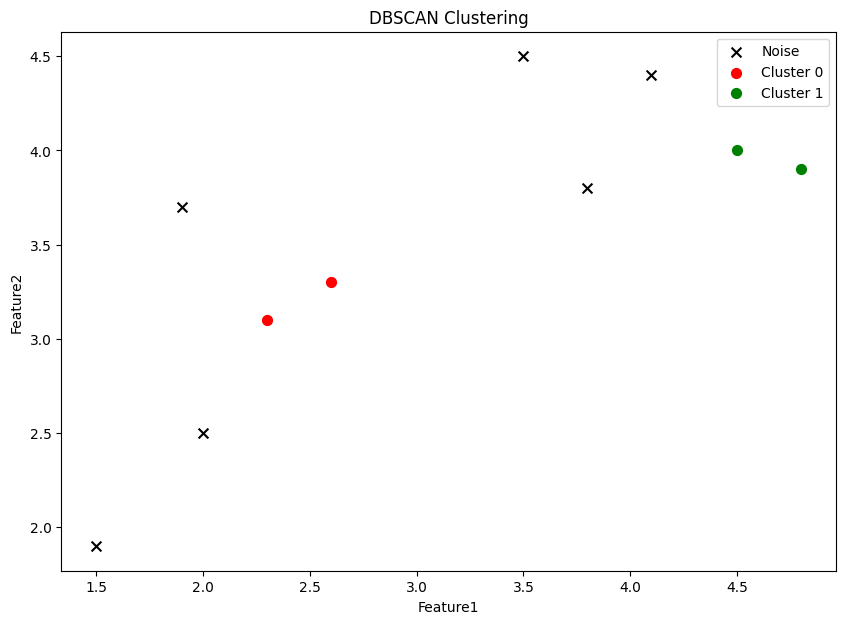

In [ ]:
# Visualize the DBSCAN clustering results
colors = np.array(['red', 'green', 'blue', 'purple', 'orange'])
unique_clusters = np.unique(data['DBSCAN_Cluster'])

plt.figure(figsize=(10, 7))
for cluster in unique_clusters:
    if cluster == -1:  # Noise points
        plt.scatter(data[data['DBSCAN_Cluster'] == cluster]['Feature1'], data[data['DBSCAN_Cluster'] == cluster]['Feature2'],
                    c='black', marker='x', s=50, label='Noise')
    else:
        plt.scatter(data[data['DBSCAN_Cluster'] == cluster]['Feature1'], data[data['DBSCAN_Cluster'] == cluster]['Feature2'],
                    c=colors[cluster % len(colors)], s=50, label=f'Cluster {cluster}')

plt.title("DBSCAN Clustering")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.show()

In [ ]:
# Print cluster assignments
print("Cluster Assignments:")
print(data[['ID', 'Feature1', 'Feature2', 'DBSCAN_Cluster']])

# Calculate Silhouette Score (higher is better)
if len(unique_clusters) > 1 and -1 in unique_clusters:
    valid_labels = data['DBSCAN_Cluster'] != -1  # Exclude noise points
    silhouette_avg = silhouette_score(X[valid_labels], data['DBSCAN_Cluster'][valid_labels])
    davies_bouldin = davies_bouldin_score(X[valid_labels], data['DBSCAN_Cluster'][valid_labels])
else:
    silhouette_avg = silhouette_score(X, data['DBSCAN_Cluster'])
    davies_bouldin = davies_bouldin_score(X, data['DBSCAN_Cluster'])

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")

Cluster Assignments:
   ID  Feature1  Feature2  DBSCAN_Cluster
0   1       2.3       3.1               0
1   2       1.9       3.7              -1
2   3       4.5       4.0               1
3   4       3.5       4.5              -1
4   5       4.8       3.9               1
5   6       2.0       2.5              -1
6   7       3.8       3.8              -1
7   8       1.5       1.9              -1
8   9       4.1       4.4              -1
9  10       2.6       3.3               0
Silhouette Score: 0.85
Davies-Bouldin Index: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


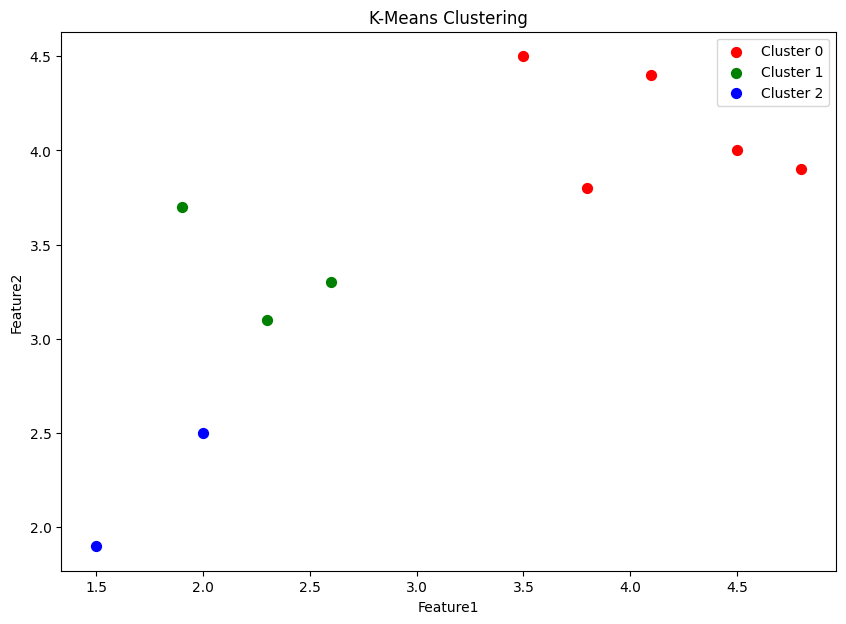

K-Means Cluster Assignments:
   ID  Feature1  Feature2  KMeans_Cluster
0   1       2.3       3.1               1
1   2       1.9       3.7               1
2   3       4.5       4.0               0
3   4       3.5       4.5               0
4   5       4.8       3.9               0
5   6       2.0       2.5               2
6   7       3.8       3.8               0
7   8       1.5       1.9               2
8   9       4.1       4.4               0
9  10       2.6       3.3               1
K-Means Silhouette Score: 0.53
K-Means Davies-Bouldin Index: 0.54

Clustering Evaluation Metrics:
K-Means Silhouette Score: 0.53
K-Means Davies-Bouldin Index: 0.54


NameError: name 'silhouette_dbscan' is not defined

In [ ]:
# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X)

# Visualize the K-Means clustering results
plt.figure(figsize=(10, 7))
for cluster in np.unique(data['KMeans_Cluster']):
    plt.scatter(data[data['KMeans_Cluster'] == cluster]['Feature1'], data[data['KMeans_Cluster'] == cluster]['Feature2'],
                c=colors[cluster % len(colors)], s=50, label=f'Cluster {cluster}')

plt.title("K-Means Clustering")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.show()

# Print K-Means cluster assignments
print("K-Means Cluster Assignments:")
print(data[['ID', 'Feature1', 'Feature2', 'KMeans_Cluster']])

# Calculate K-Means evaluation metrics
silhouette_kmeans = silhouette_score(X, data['KMeans_Cluster'])
davies_bouldin_kmeans = davies_bouldin_score(X, data['KMeans_Cluster'])

print(f"K-Means Silhouette Score: {silhouette_kmeans:.2f}")
print(f"K-Means Davies-Bouldin Index: {davies_bouldin_kmeans:.2f}")

# Summary and comparison
print("\nClustering Evaluation Metrics:")
print(f"K-Means Silhouette Score: {silhouette_kmeans:.2f}")
print(f"K-Means Davies-Bouldin Index: {davies_bouldin_kmeans:.2f}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.2f}")
print(f"DBSCAN Davies-Bouldin Index: {davies_bouldin_dbscan:.2f}")